# Training of numbers

Problématique étudiée

La problématique étudiée est le cas avec le dataset hand-written digits. L'objectif de ce cas est de reconnaître des chiffres annotés à la main à partir d'une base de données disponible.

Il s'agit donc d'un cas de machine learning supervisé, et plus spécifiquement d'un cas de classification.

Ce notebook va vous guider à travers ce cas concret de classification, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : les SVM (Support-Vector Machine). Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

# Importation des différentes librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

La première étape est d'importer le dataset et de voir de quoi il est constitué. Ici on importe le dataset hand-written digits.

In [2]:
Digits = load_digits()
print(dir(Digits))# features

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [3]:
print(Digits.data)#dataset digit

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
print(Digits.target)# labels

[0 1 2 ... 8 9 8]


In [5]:
D = pd.DataFrame(Digits.data)
print(D)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

In [6]:
D['target'] = pd.DataFrame(Digits.target)# Ajout colonne target(une variable dependant)
print(D)

        0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  target  
0     0.0  6.0  13.0  

 Nous choisissons le modèle à mettre en place, nous l'apprenons, et nous le testons:

In [7]:
mod = svm.SVC(kernel='linear' , gamma=0.1 , C=1)

Puis, nous divisons notre jeu de données d'entrée en deux sous-ensembles, afin de constituer nos jeux de données d'apprentissage (constitué ici de 50 % des données de départ), et de test (50 % des données de départ).

Si vous souhaitez voir les différences de résultat en fonction de la taille des données test, vous devrez changé le paramètre test_size qui indique le pourcentage de donnée que vous selectionné dans test.

Cependant attention à ne pas lui donnée une valeure trop basse en pensant que votre modèle sera meilleure car vous risqueriez le sur-apprentissage. C'est-à-dire que votre modèle va se complexifier et ne sera plus assez général et vous perdrez donc en précision. Je vous invite à essayer avec une valeure de 0.1 et de comparer avec celle actuelle pour vérifiez cela.

In [8]:
#train data
x,y = Digits.data[:-10] , Digits.target[:-10]

In [9]:
#train and test mod
mod.fit(x,y)
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.5)
print(len(x_train))
print(len(x_test))

893
894


 Enfin, nous regardons quelques résultats de prédiction, pour voir de manière qualitative si le modèle semble bien fonctionner

Prediction :  [8]


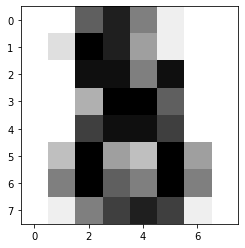

In [13]:
print('Prediction : ', mod.predict(Digits.data[[-1]]))
plt.imshow(Digits.images[-1], cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

In [1]:
mod.fit(x_train,y_train)
print(mod)
print(mod.score(x_test, y_test))

NameError: name 'mod' is not defined

Pour conclure, nous avons pu voir qu'un modèle simple tel que le SVM fonctionne très bien pour ce problème car il arrive à trouver 97% de bonne réponse. Il nous permet en plus de ça de trouver le résultat de manière très rapide, quasiment instantanné. Cela nous montre donc qu'il ne faut pas utiliser un modèle qui utilise un réseaux de neuronne, bien plus long en terme de calcul, pour trouver notre réponse. de la même façon que l'on utilise pas un lance flamme pour allumer un barbecue !

Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !